In [1]:
%cd
!git clone --quiet https://github.com/firluk/PuzzleProject2021.git


/root


In [2]:
%cd ~/PuzzleProject2021
!pip install -r requirements.txt --quiet

/root/PuzzleProject2021
     |████████████████████████████████| 26.5 MB 1.5 MB/s 
     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 377 kB 68.7 MB/s 
     |████████████████████████████████| 2.9 MB 54.0 MB/s 
     |████████████████████████████████| 590 kB 43.9 MB/s 
     |████████████████████████████████| 1.0 MB 53.3 MB/s 
     |████████████████████████████████| 454 kB 69.7 MB/s 
     |████████████████████████████████| 26.1 MB 1.4 MB/s 
     |████████████████████████████████| 3.0 MB 45.5 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 244 kB 69.2 MB/s 
     |████████████████████████████████| 1.6 MB 61.2 MB/s 
     |████████████████████████████████| 298 kB 60.7 MB/s 
     |████████████████████████████████| 120 kB 68.7 MB/s 
     |████████████████████████████████| 154 kB 70.5 MB/s 
     |████████████████████████████████| 82 kB 645 kB/s 
ERROR: pip's dependency resolver does not currently

## Drive mount

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir /weights
!mkdir /plots
# weights for puzzle segmentation
!cp /content/drive/MyDrive/Puzzles/plots_mask_weights/weights/mask_rcnn_puzzle.h5 /weights/mask_rcnn_puzzle.h5 
!cp /content/drive/MyDrive/Puzzles/plots_mask_weights/plots/full_downscale.png /plots/full_downscale.png

In [5]:
# imports like in main.py
from mst_solver import MST_Solver
from puzzle import *
from puzzle_piece_detector.inference_callable import Inference
from utils import print_sol, masks_in_scale, image_in_scale

# imports for colab
import PIL.Image
from IPython.display import Image, display
import numpy as np

Using TensorFlow backend.


In [6]:
# weights_path, image_path = '/content/drive/MyDrive/Puzzles/plots_mask_weights/weights/mask_rcnn_puzzle.h5', '/plots/full_downscale.png'
weights_path = '/content/drive/MyDrive/Puzzles/plots_mask_weights/weights/mask_rcnn_puzzle.h5' 

image_path = '/content/drive/MyDrive/Puzzles/plots_mask_weights/plots/12p/full_downscale.png'

## Upload a file of your own instead

In [ ]:
from google.colab import files
uploaded = files.upload()



In [ ]:
image_path = f'/content/{list(uploaded.keys())[0]}'

In [ ]:
display(Image(image_path))

## Decide which method to use

In [7]:
# is_inference_type = True
# segmentation_method = (is_inference_type, Inference.infer_masks_and_blur)

import utils
is_inference_type = False
segmentation_method = (is_inference_type, utils.infer_using_saturation_and_hue)

In [8]:
pieces, masks = segment_to_masks_and_extract_pieces(weights_path, image_path, segmentation_method)

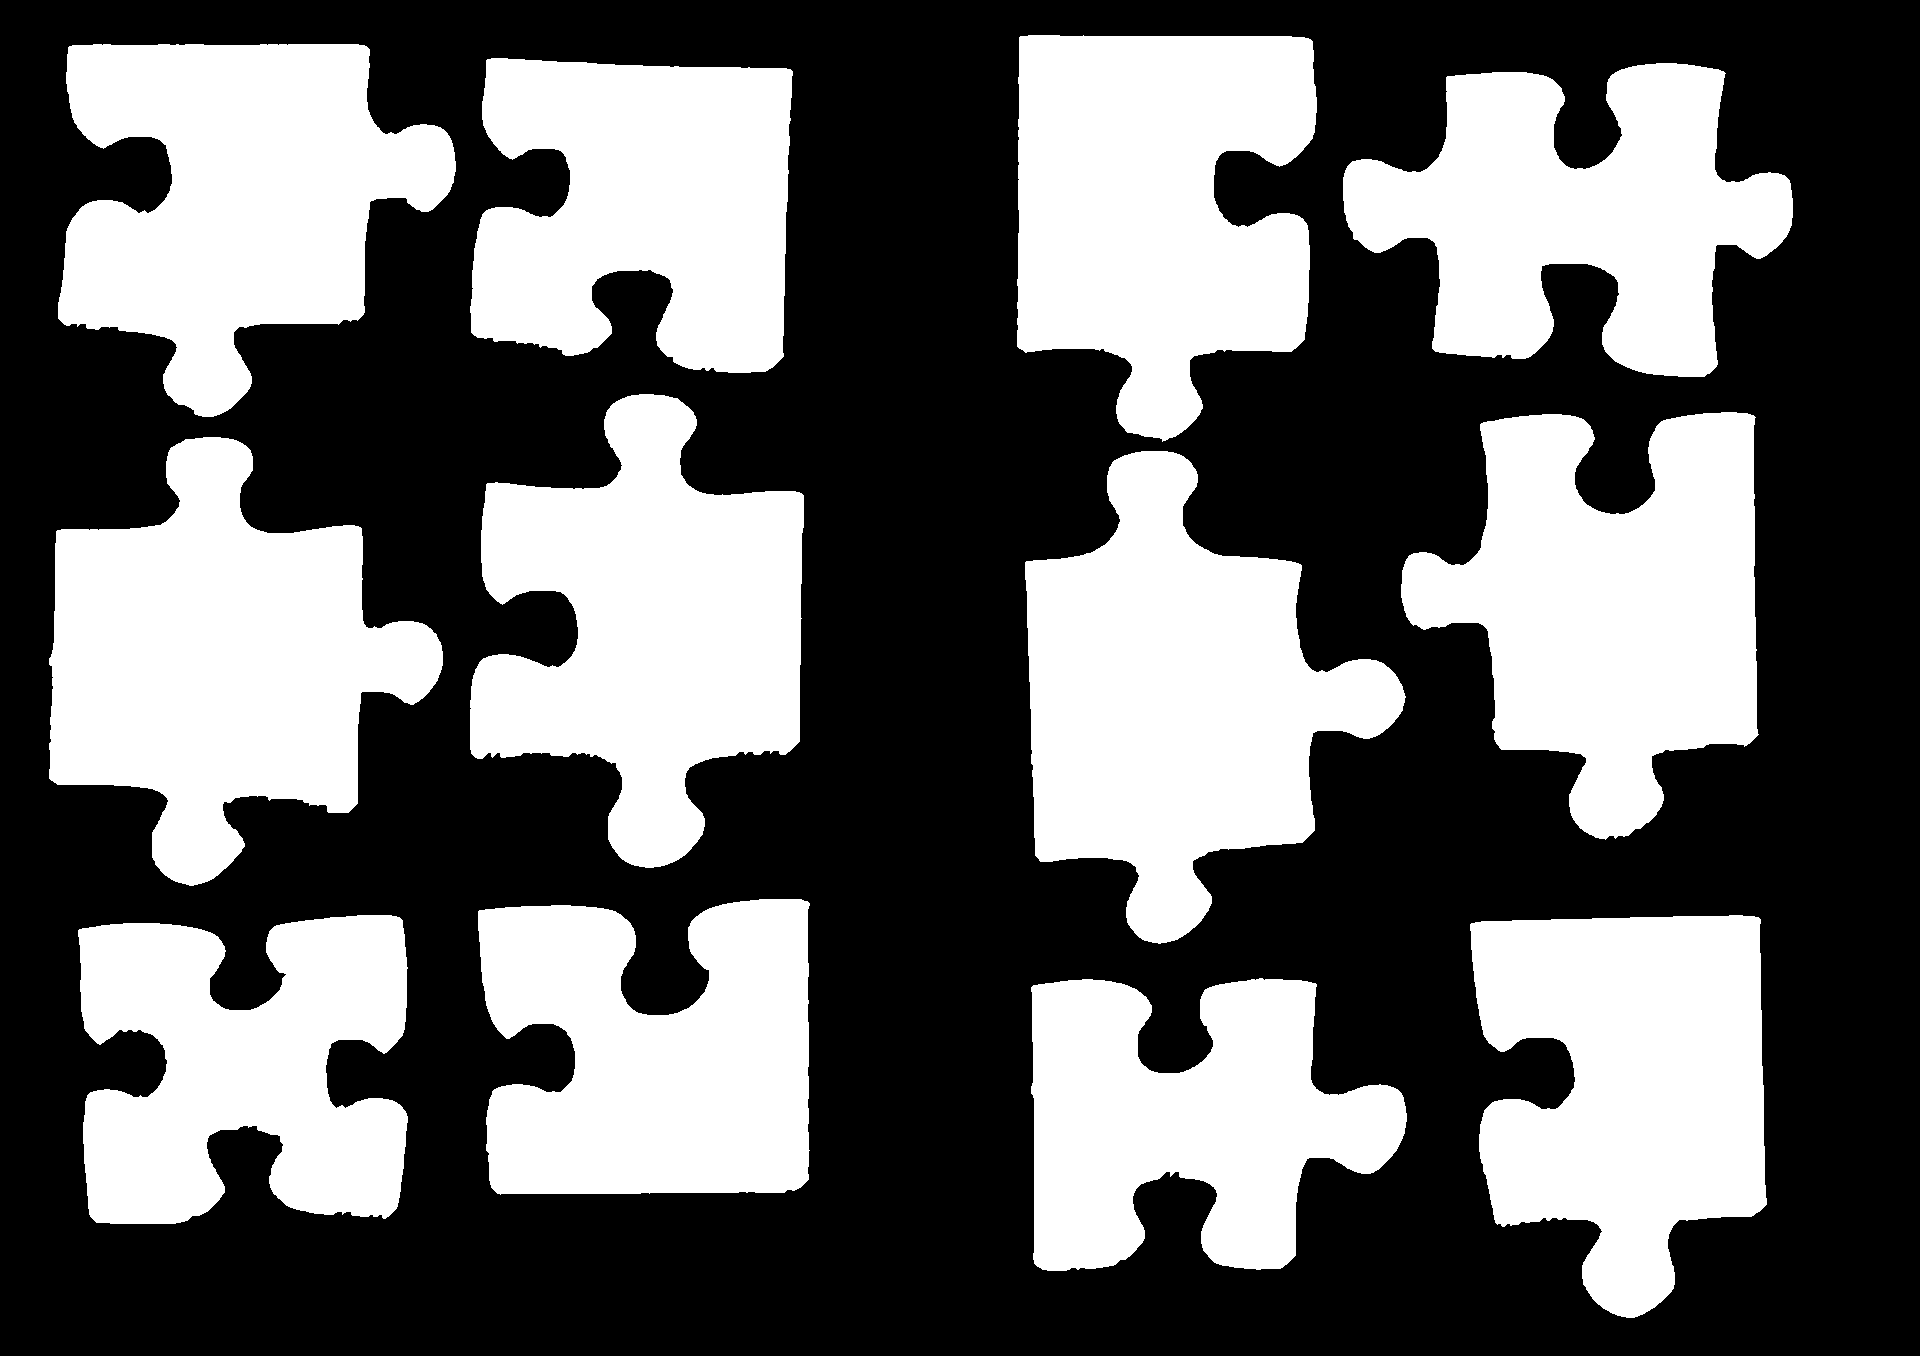

In [9]:
single_mask = np.squeeze(np.sum(masks, -1, keepdims=True)).astype(np.uint8)
display(PIL.Image.fromarray(single_mask))

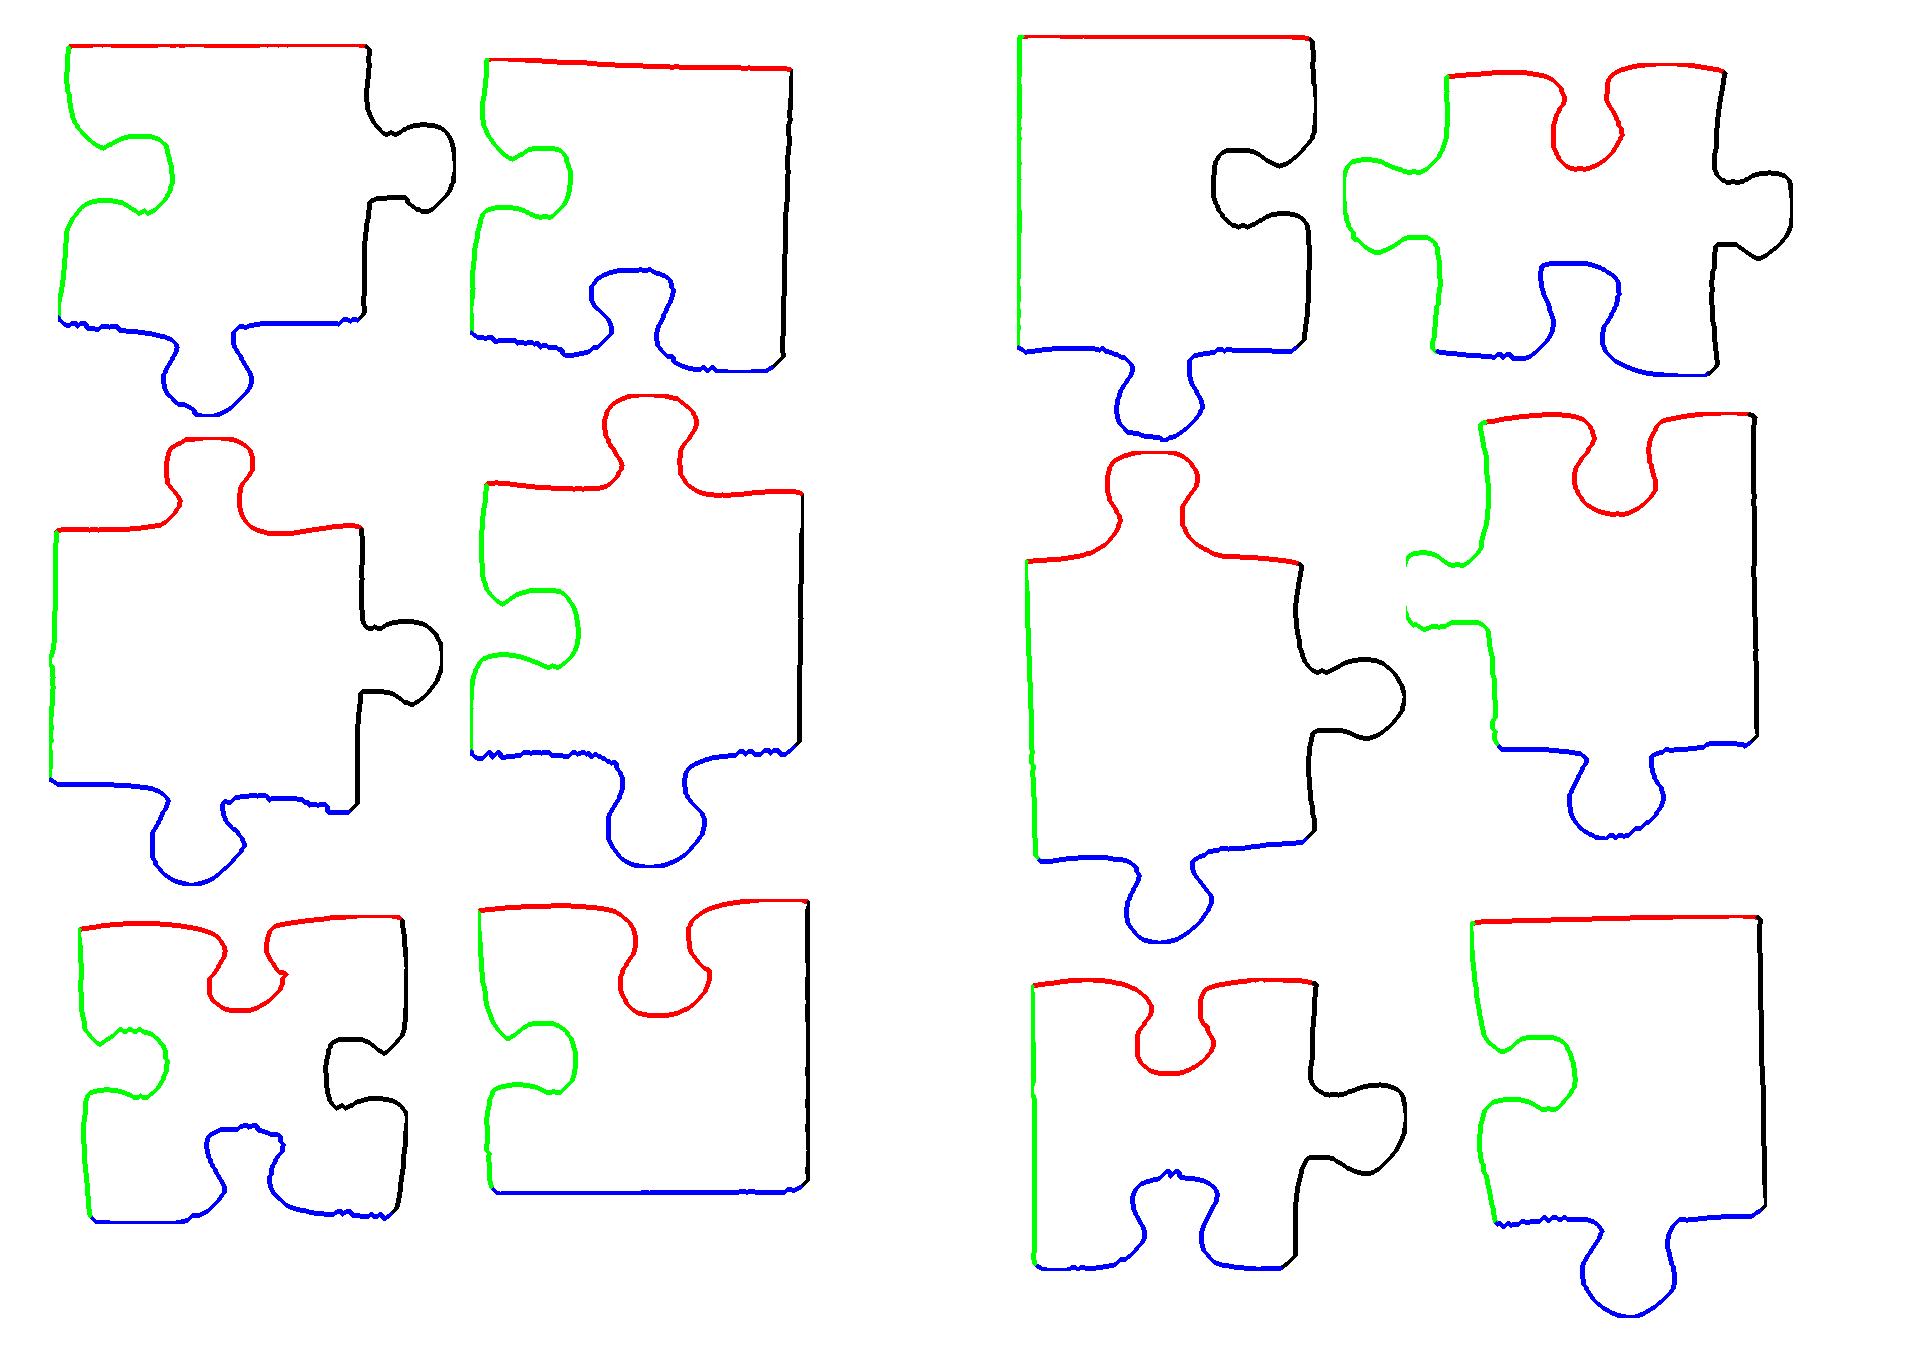

In [10]:
display(PIL.Image.fromarray(paint_facets_distinct(masks, pieces)))

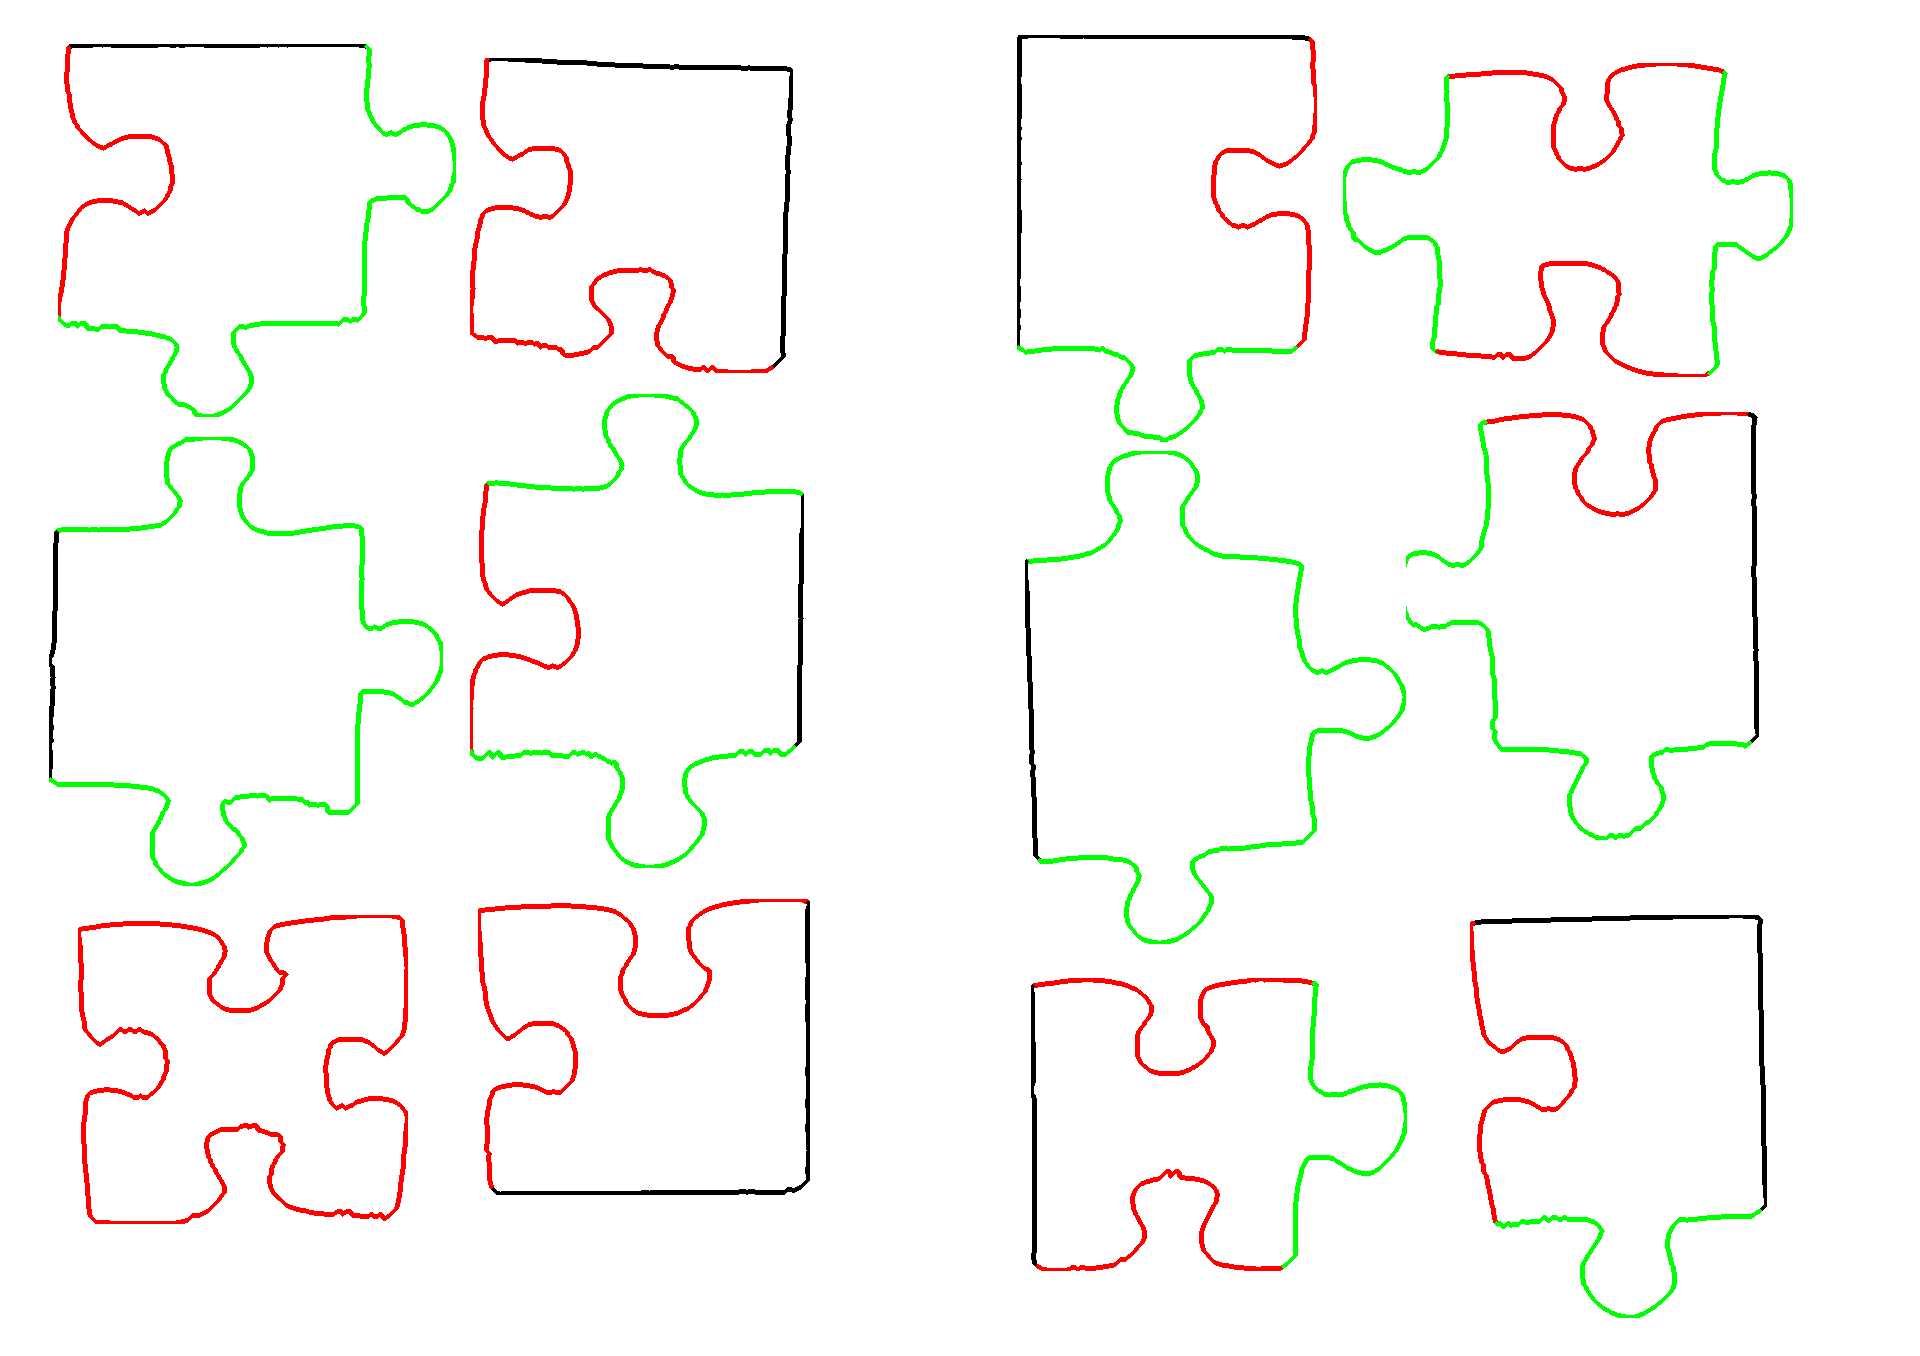

In [11]:
display(PIL.Image.fromarray(paint_facets_by_type(masks, pieces)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

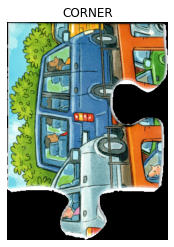

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

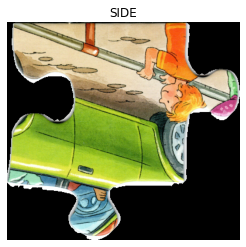

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

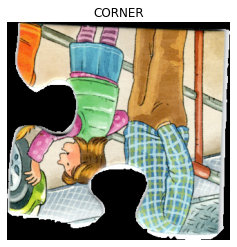

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

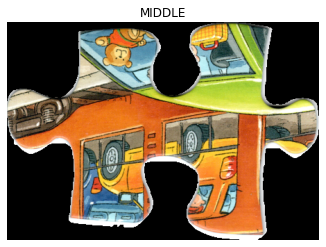

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

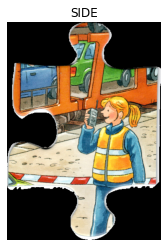

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

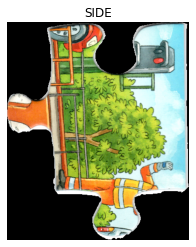

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

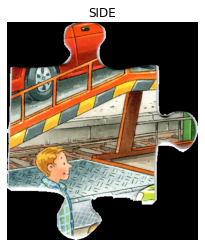

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

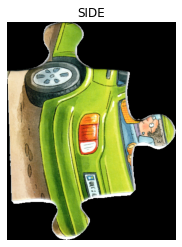

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

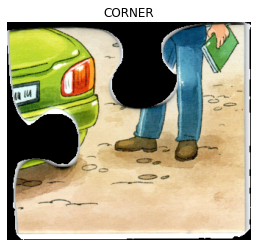

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

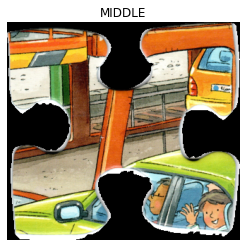

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

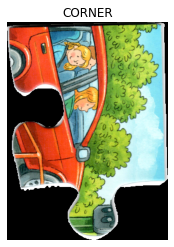

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

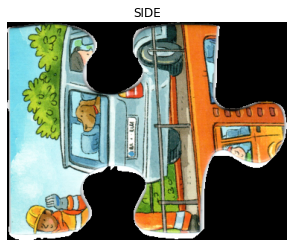

<IPython.core.display.Javascript object>

In [12]:
from matplotlib import pylab
from google.colab import widgets
tb = widgets.TabBar([str(i) for i in range(len(pieces))])
for i, piece in enumerate(pieces):
  with tb.output_to(i, select=(i == 0)):
    pylab.imshow(piece.cropped_image)
    pylab.axis('off')
    pylab.title(piece.type.name)
    pylab.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

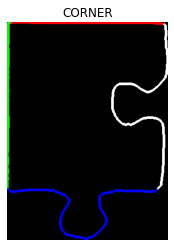

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

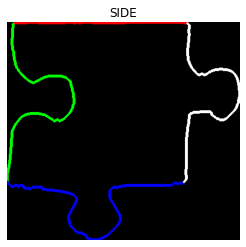

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

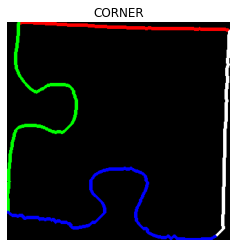

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

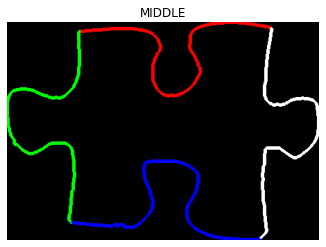

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

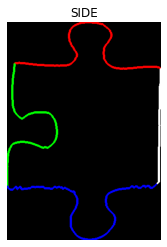

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

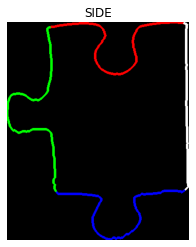

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

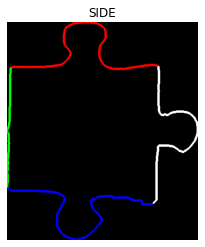

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

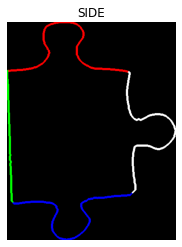

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

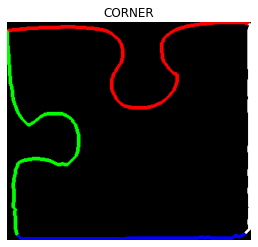

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

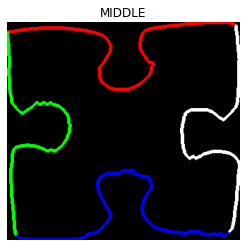

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

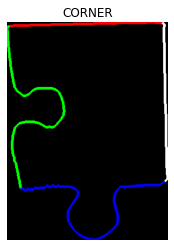

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

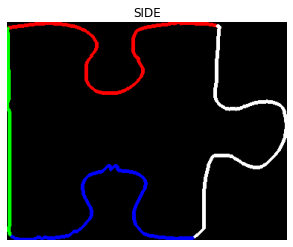

<IPython.core.display.Javascript object>

In [13]:
from matplotlib import pylab
from google.colab import widgets
tb = widgets.TabBar([str(i) for i in range(len(pieces))])
for i, piece in enumerate(pieces):
  with tb.output_to(i, select=(i == 0)):
    # img = np.ones_like(piece.cropped_image) * 255
    img = np.zeros_like(piece.cropped_image)
    facet_colors = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 255]]).astype(np.uint8)
    for fi in range(len(piece.facets)):
        mask = piece.facets[fi].facet_mask_custom_contour_size(3)
        img[mask, :] = facet_colors[fi, :]
    pylab.imshow(img)
    pylab.axis('off')
    pylab.title(piece.type.name)
    pylab.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

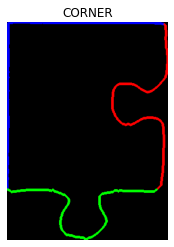

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

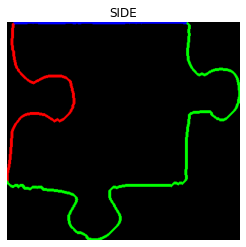

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

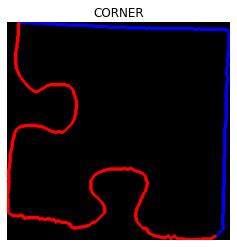

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

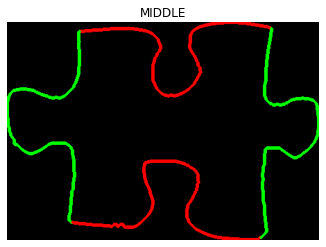

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

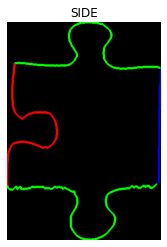

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

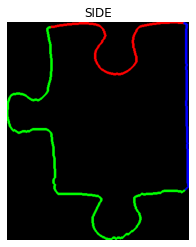

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

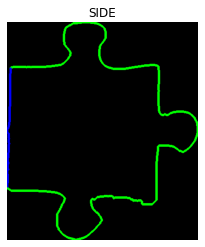

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

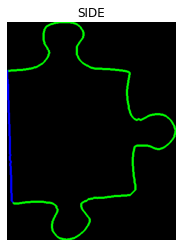

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

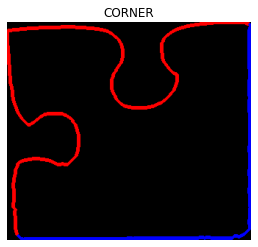

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

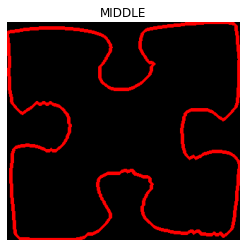

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

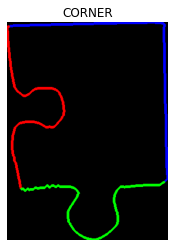

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

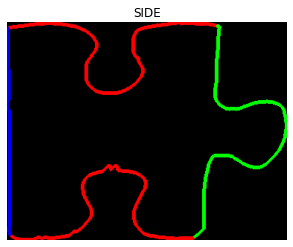

<IPython.core.display.Javascript object>

In [14]:
from matplotlib import pylab
from google.colab import widgets
tb = widgets.TabBar([str(i) for i in range(len(pieces))])
for i, piece in enumerate(pieces):
  with tb.output_to(i, select=(i == 0)):
    # img = np.ones_like(piece.cropped_image) * 255
    img = np.zeros_like(piece.cropped_image)
    facet_colors = dict()
    facet_colors[Facet.Type.FLAT] = np.array([0, 0, 255], dtype=np.uint8)
    facet_colors[Facet.Type.TAB] = np.array([0, 255, 0], dtype=np.uint8)
    facet_colors[Facet.Type.BLANK] = np.array([255, 0, 0], dtype=np.uint8)
    for fi in range(len(piece.facets)):
        facet = piece.facets[fi]
        mask = facet.facet_mask_custom_contour_size(3)
        img[mask, :] = facet_colors[facet.type]
    pylab.imshow(img)
    pylab.axis('off')
    pylab.title(piece.type.name)
    pylab.show()

In [15]:
iou, n_facets, n_pieces, n_side_pieces, n_middle_pieces = evaluate_edge_compatibility(pieces, Facet.iou)
piece_def = (n_pieces, n_side_pieces, n_middle_pieces)

scale = 0.1
image = skimage.io.imread(image_path)

sml_image = image_in_scale(image, scale)
sml_masks = masks_in_scale(masks, scale)
sml_pieces = pieces_from_masks(sml_masks, sml_image)
mgc, n_facets, n_pieces, n_side_pieces, n_middle_pieces = evaluate_edge_compatibility(sml_pieces, Facet.mgc)
cmp = calc_cmp_from_iou_and_mgc(iou, mgc, n_facets, n_pieces, pieces)

edges_by_iou = sort_and_filter(n_pieces, n_facets, 0, iou, descending=True)
edges_by_mgc = sort_and_filter(n_pieces, n_facets, 0, mgc, descending=False)
edges_by_cmp = sort_and_filter(n_pieces, n_facets, 0, cmp, descending=False)

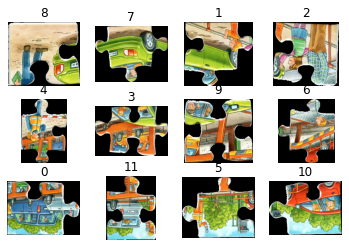

<Figure size 432x288 with 0 Axes>

In [16]:
solution_iou = MST_Solver(piece_def, edges_by_iou, iou).solveMST()
print_sol(solution_iou, pieces, "iou")

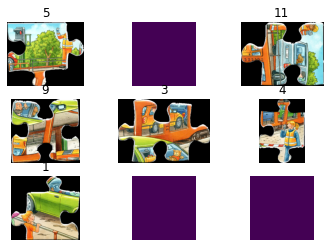

<Figure size 432x288 with 0 Axes>

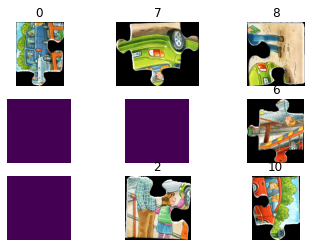

<Figure size 432x288 with 0 Axes>

In [17]:
solution_mgc = MST_Solver(piece_def, edges_by_mgc, mgc).solveMST()
print_sol(solution_mgc, pieces, "mgc")

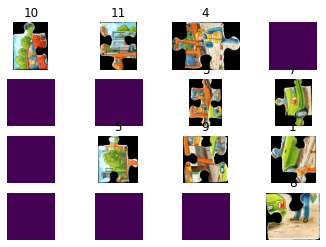

<Figure size 432x288 with 0 Axes>

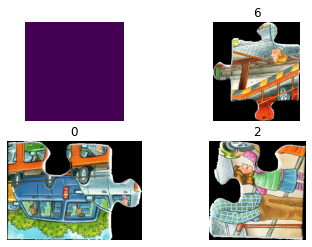

<Figure size 432x288 with 0 Axes>

In [18]:
solution_cmp = MST_Solver(piece_def, edges_by_cmp, cmp).solveMST()
print_sol(solution_cmp, pieces, "cmp")